In [1]:
!pip install textblob

In [1]:
#Importing Libraries  and Modules

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
pd.set_option('display.max_colwidth', 100)
from textblob import Word
import random
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#  Extracting the requried data from websites by web scraping

In [3]:
''' Extracted questoin and answers of Supervised Learning from different websites and converted them into one csv file '''

' Extracted questoin and answers of Supervised Learning from different websites and converted them into one csv file '

In [4]:
url=requests.get('https://www.upgrad.com/blog/machine-learning-interview-questions-answers-ii/')
url

<Response [200]>

In [5]:
soups=[]
soup=bs(url.content,'html.parser')
soups.append(soup)
soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <link href="https://gmpg.org/xfn/11" rel="profile"/>\n  <meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots">\n   <!-- This site is optimized with the Yoast SEO plugin v16.6.1 - https://yoast.com/wordpress/plugins/seo/ -->\n   <title>\n    25 Machine Learning Interview Questions &amp; Answers - Linear Regression | upGrad blog\n   </title>\n   <meta content="Looking for Machine Learning Interview Questions &amp; Answers to prepare? We have an ultimate guide of knowledge-based Machine Learning Interview Questions and Answers." name="description"/>\n   <link href="https://www.upgrad.com/blog/machine-learning-interview-questions-answers-ii/" rel="canonical"/>\n   <meta content="en_US" property="og:locale"/>\n   <meta content="article" property="og:type"/>\n   <meta content="25 Machine Lear

In [6]:
que=[]
for i in soups:
    reviews=i.find_all(['h3','p'])
    que.append(reviews)

In [7]:
que_extract=[]
for i in que:
    for j in i:
        que_extract.append(j.get_text())
que_extract

['\n\t\t\t\t\t\t\t\t\t\t\tThulasiram is a veteran with 20 years of experience in production planning, supply chain management, quality assurance, Information Technology, and training. Trained in Data Analysis from IIIT Bangalore and UpGrad,…\t\t\t\t\t\t\t\t\t\t',
 'It is a common practice to test data science aspirants on commonly used machine learning algorithms in interviews. These conventional algorithms being linear regression, logistic regression, clustering, decision trees etc. Data scientists are expected to possess an in-depth knowledge of these algorithms. ',
 'We consulted hiring managers and data scientists from various organisations to know about the typical ML questions which they ask in an interview. Based on their extensive feedback a set of question and answers were prepared to help aspiring data scientists in their conversations. Q&As on these algorithms will be provided in a series of four blog posts. ',
 'Each blog post will cover the following topic:-',
 'Table of C

In [8]:
head=['\n\t\t\t\t\t\t\t\t\t\t\tThulasiram is a veteran with 20 years of experience in production planning, supply chain management, quality assurance, Information Technology, and training. Trained in Data Analysis from IIIT Bangalore and UpGrad,…\t\t\t\t\t\t\t\t\t\t',
 'It is a common practice to test data science aspirants on commonly used machine learning algorithms in interviews. These conventional algorithms being linear regression, logistic regression, clustering, decision trees etc. Data scientists are expected to possess an in-depth knowledge of these algorithms. ',
 'We consulted hiring managers and data scientists from various organisations to know about the typical ML questions which they ask in an interview. Based on their extensive feedback a set of question and answers were prepared to help aspiring data scientists in their conversations. Q&As on these algorithms will be provided in a series of four blog posts. ',
 'Each blog post will cover the following topic:-',
 'Table of Contents','\n Machine Learning Engineers: Myths vs. Realities\nThat’s the end of the first section of this series. Stick around for the next part of the series which consist of questions based on Logistic Regression. Feel free to post your comments.\nCo-authored by – Ojas Agarwal\nisSingle = true; catStr = Artificial Intelligence;\n\nLead the AI Driven Technological Revolution\n\n\n\t\t\t\t\t\t\t\t\t\tPG Diploma in Machine Learning and Artificial Intelligence\t\t\t\t\t\t\t\t\t\nLearn More\n\n\n',
 'That’s the end of the first section of this series. Stick around for the next part of the series which consist of questions based on Logistic Regression. Feel free to post your comments.\nCo-authored by – Ojas Agarwal',
 ' Cancel reply',
 'Your email address will not be published.',
 'Comment ',
 'Name ',
 'Email ',
 'Website ',
 ' \n\n',
 '',
 'Our Trending Machine Learning Courses',
 'Accelerate Your Career with upGrad',
 'Our Popular Machine Learning Course',
 'Building Careers of Tomorrow',
 'Register for a Demo Course',
 'Register for a Demo Course',
 'Register for a Demo Course',
 'Talk to our Counselor to find a best course suitable to your Career Growth']
clean=[]
for i in que_extract:
    if i not in head:
        clean.append(i)
    

In [9]:
import re
pattern=r"^\d+\.[\w\d\s]+\?*"
flag=2
str1=""
ques=[]
ans=[]
j=0
for i in clean:
    j=j+1
    w=re.findall(pattern,i)
    #print(w)
    if len(w)>0:
        ques.append(str(i))
        if len(ques)==flag:
            ans.append(str1)
            str1=""
            flag=flag+1
    else:
        str1=str1+str(i)
ans.append(str1)
print(len(ques))
print(len(ans))
for i in range(len(ans)):
    ans[i]=ans[i].replace('\n'," ")
for i in range(len(ans)):
    #ques[i]=ques[i].replace('\n'," ")
    ques[i]=re.sub(r"[0-9 ]+\."," ",ques[i])
    
df=pd.DataFrame({"Questions":ques,"Answer":ans})
pd.set_option("display.max_colwidth", None)
df


25
25


Questions  \
0                                                                                                                                            What is linear regression?   
1                                                                                                                   State the assumptions in a linear regression model.   
2                                                                                         What is feature engineering? How do you apply it in the process of modelling?   
3                                                                                                 What is the use of regularisation? Explain L1 and L2 regularisations.   
4                                                                                                           How to choose the value of the parameter learning rate (α)?   
5                                                                                                          How to choose the value of the regularisation parameter (λ)?   
6                                                                                                                Can we use linear regression for time series analysis?   
7                                                                                      What value is the sum of the residuals of a linear regression close to? Justify.   
8                                                                                                              How does multicollinearity affect the linear regression?   
9                                                  What is the normal form (equation) of linear regression? When should it be preferred to the gradient descent method?   
10    You run your regression on different subsets of your data, and in each subset, the beta value for a certain variable varies wildly. What could be the issue here?   
11         Your linear regression doesn’t run and communicates that there is an infinite number of best estimates for the regression coefficients. What could be wrong?   
12                                                                                                        What do you mean by adjusted R2? How is it different from R2?   
13                                                                                                             How do you interpret the residual vs fitted value curve?   
14                                                                                  What is heteroscedasticity? What are the consequences, and how can you overcome it?   
15                                                                                                                                What is VIF? How do you calculate it?   
16                                                                                               How do you know that linear regression is suitable for any given data?   
17                                                                                                                 How is hypothesis testing used in linear regression?   
18                                                                                                          Explain gradient descent with respect to linear regression.   
19                                                                                                                      How do you interpret a linear regression model?   
20                                                                                                                                           What is robust regression?   
21                                                                                                      Which graphs are suggested to be observed before model fitting?   
22                                                                                                                                What is the generalized linear model?   
23                                                    

In [10]:
'''Done web scraping of websites of requried topic in the above method and saved all the question and answers in one csv file'''

'Done web scraping of websites of requried topic in the above method and saved all the question and answers in one csv file'

In [11]:
# Data Pre processing and EDA 

In [12]:
data=pd.read_csv('Dataset.csv',engine='python',encoding = 'unicode_escape')

In [13]:
data

,Unnamed: 0,Questions,Answer,question_clean
0,0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, i.e. tries to find the best linear relationship between the independent and dependent variables.In technical terms: It is a supervised machine learning algorithm that finds the best linear-fit relationship on the given dataset, between independent and dependent variables. It is mostly done with the help of the Sum of Squared Residuals Method, known as the Ordinary least squares (OLS) method.",linear regression algorithm
1,1,How do you interpret a linear regression model?,"As we know that the linear regression model is of the form:The significance of the linear regression model lies in the fact that we can easily interpret and understand the marginal changes in the independent variables(predictors) and observed their consequences on the dependent variable(response).Therefore, a linear regression model is quite easy to interpret.For Example, if we increase the value of x1 increases by 1 unit, keeping other variables constant, then the total increase in the value of y will be Î²i and the intercept term (Î²0) is the response when all the predictorâs terms are set to zero or not considered.",interpret linear regression model
2,2,What are the basic assumptions of the Linear Regression Algorithm?,"The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relationship between the features and target. Homoscedasticity: The error term has a constant variance. Multicollinearity: There is no multicollinearity between the features. Independence: Observations are independent of each other. Normality: The error(residuals) follows a normal distribution. Now, letâs break these assumptions into different categories:It is assumed that there exists a linear relationship between the dependent and the independent variables. Sometimes, this assumption is known as the âlinearity assumptionâ. Normality assumption: The error terms, Îµ(i), are normally distributed. Zero mean assumption: The residuals have a mean value of zero. Constant variance assumption: The residual terms have the same (but unknown) value of variance, Ï2. This assumption is also called the assumption of homogeneity or homoscedasticity. Independent error assumption: The residual terms are independent of each other, i.e. their pair-wise covariance value is zero. The independent variables are measured without error. There does not exist a linear dependency between the independent variables, i.e. there is no multicollinearity in the data.",basic assumption linear regression algorithm
3,3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesnât capture causality. It is visualized by a single point.Regression:Â It measures how one variable affects another variable. Regression is all about model fitting. It tries to capture the causality and describes the cause and the effect. It is visualized by a regression line.,difference correlation regression
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm is used to optimize the cost function to find the values of the Î²s (estimators) corresponding to the optimized value of the cost function.The working of Gradient descent is similar to a ball that rolls down a graph (ignoring the inertia). In that case, the ball moves along the direction of the maximum gradient and comes to rest at the flat surface i.e, corresponds to minima.Mathematically, the main objective of the gradient descent for linear regression is to find the solution of the following expression,ArgMin J(Î¸0, Î¸1), where J(Î¸0, Î¸1) represents the cost function of the linear regression. It is given by :Here, h is the linear hypothesis model, defined

### Removing punctuation,Tokenization,Lower case,Stopwords removal , lemmatization  on Questions column

In [14]:
data['question_clean'] = data['Questions'].str.replace('[^\w\s]','')# Removing Punctuations
data['question_clean'] = data['question_clean'].apply(word_tokenize)# Tokenization
data['question_clean'] = data['question_clean'].apply(lambda x: [word.lower() for word in x]) # Converting all Characters to Lowercas

In [15]:
stop_words = set(stopwords.words('english'))
data['question_clean'] = data['question_clean'].apply(lambda x: [word for word in x if word not in stop_words])#Removing stop words
data['question_clean'] = [' '.join(map(str, l)) for l in data['question_clean']] # joining into string to perform lemmatization
data['question_clean'] = data['question_clean'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [16]:
data

,Unnamed: 0,Questions,Answer,question_clean
0,0,What is Linear Regression Algorithm?,"In simple terms: It is a method of finding the best straight line fitting to the given dataset, i.e. tries to find the best linear relationship between the independent and dependent variables.In technical terms: It is a supervised machine learning algorithm that finds the best linear-fit relationship on the given dataset, between independent and dependent variables. It is mostly done with the help of the Sum of Squared Residuals Method, known as the Ordinary least squares (OLS) method.",linear regression algorithm
1,1,How do you interpret a linear regression model?,"As we know that the linear regression model is of the form:The significance of the linear regression model lies in the fact that we can easily interpret and understand the marginal changes in the independent variables(predictors) and observed their consequences on the dependent variable(response).Therefore, a linear regression model is quite easy to interpret.For Example, if we increase the value of x1 increases by 1 unit, keeping other variables constant, then the total increase in the value of y will be Î²i and the intercept term (Î²0) is the response when all the predictorâs terms are set to zero or not considered.",interpret linear regression model
2,2,What are the basic assumptions of the Linear Regression Algorithm?,"The basic assumptions of the Linear regression algorithm are as follows: Linearity: The relationship between the features and target. Homoscedasticity: The error term has a constant variance. Multicollinearity: There is no multicollinearity between the features. Independence: Observations are independent of each other. Normality: The error(residuals) follows a normal distribution. Now, letâs break these assumptions into different categories:It is assumed that there exists a linear relationship between the dependent and the independent variables. Sometimes, this assumption is known as the âlinearity assumptionâ. Normality assumption: The error terms, Îµ(i), are normally distributed. Zero mean assumption: The residuals have a mean value of zero. Constant variance assumption: The residual terms have the same (but unknown) value of variance, Ï2. This assumption is also called the assumption of homogeneity or homoscedasticity. Independent error assumption: The residual terms are independent of each other, i.e. their pair-wise covariance value is zero. The independent variables are measured without error. There does not exist a linear dependency between the independent variables, i.e. there is no multicollinearity in the data.",basic assumption linear regression algorithm
3,3,Explain the difference between Correlation and Regression.,Correlation: It measures the strength or degree of relationship between two variables. It doesnât capture causality. It is visualized by a single point.Regression:Â It measures how one variable affects another variable. Regression is all about model fitting. It tries to capture the causality and describes the cause and the effect. It is visualized by a regression line.,explain difference correlation regression
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,"Gradient descent is a first-order optimization algorithm. In linear regression, this algorithm is used to optimize the cost function to find the values of the Î²s (estimators) corresponding to the optimized value of the cost function.The working of Gradient descent is similar to a ball that rolls down a graph (ignoring the inertia). In that case, the ball moves along the direction of the maximum gradient and comes to rest at the flat surface i.e, corresponds to minima.Mathematically, the main objective of the gradient descent for linear regression is to find the solution of the following expression,ArgMin J(Î¸0, Î¸1), where J(Î¸0, Î¸1) represents the cost function of the linear regression. It is given by :Here, h is the linear hypothesis model,

In [17]:
data['Answer'] = data['Answer'].str.replace('[^\w\s]','')# Removing Punctuations

In [18]:
data

,Unnamed: 0,Questions,Answer,question_clean
0,0,What is Linear Regression Algorithm?,In simple terms It is a method of finding the best straight line fitting to the given dataset ie tries to find the best linear relationship between the independent and dependent variablesIn technical terms It is a supervised machine learning algorithm that finds the best linearfit relationship on the given dataset between independent and dependent variables It is mostly done with the help of the Sum of Squared Residuals Method known as the Ordinary least squares OLS method,linear regression algorithm
1,1,How do you interpret a linear regression model?,As we know that the linear regression model is of the formThe significance of the linear regression model lies in the fact that we can easily interpret and understand the marginal changes in the independent variablespredictors and observed their consequences on the dependent variableresponseTherefore a linear regression model is quite easy to interpretFor Example if we increase the value of x1 increases by 1 unit keeping other variables constant then the total increase in the value of y will be Î²i and the intercept term Î²0 is the response when all the predictorâs terms are set to zero or not considered,interpret linear regression model
2,2,What are the basic assumptions of the Linear Regression Algorithm?,The basic assumptions of the Linear regression algorithm are as follows Linearity The relationship between the features and target Homoscedasticity The error term has a constant variance Multicollinearity There is no multicollinearity between the features Independence Observations are independent of each other Normality The errorresiduals follows a normal distribution Now letâs break these assumptions into different categoriesIt is assumed that there exists a linear relationship between the dependent and the independent variables Sometimes this assumption is known as the âlinearity assumptionâ Normality assumption The error terms Îµi are normally distributed Zero mean assumption The residuals have a mean value of zero Constant variance assumption The residual terms have the same but unknown value of variance Ï2 This assumption is also called the assumption of homogeneity or homoscedasticity Independent error assumption The residual terms are independent of each other ie their pairwise covariance value is zero The independent variables are measured without error There does not exist a linear dependency between the independent variables ie there is no multicollinearity in the data,basic assumption linear regression algorithm
3,3,Explain the difference between Correlation and Regression.,Correlation It measures the strength or degree of relationship between two variables It doesnât capture causality It is visualized by a single pointRegressionÂ It measures how one variable affects another variable Regression is all about model fitting It tries to capture the causality and describes the cause and the effect It is visualized by a regression line,explain difference correlation regression
4,4,Explain the Gradient Descent algorithm with respect to linear regression.,Gradient descent is a firstorder optimization algorithm In linear regression this algorithm is used to optimize the cost function to find the values of the Î²s estimators corresponding to the optimized value of the cost functionThe working of Gradient descent is similar to a ball that rolls down a graph ignoring the inertia In that case the ball moves along the direction of the maximum gradient and comes to rest at the flat surface ie corresponds to minimaMathematically the main objective of the gradient descent for linear regression is to find the solution of the following expressionArgMin JÎ0 Î1 where JÎ0 Î1 represents the cost function of the linear regression It is given by Here h is the linear hypothesis model defined as hÎ0 Î1xy is the target column or output and m is the number of data points in the training setStep1 Gradient Descen

In [19]:
# WordCloud

In [20]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [21]:
text = ' '.join(data['question_clean'])

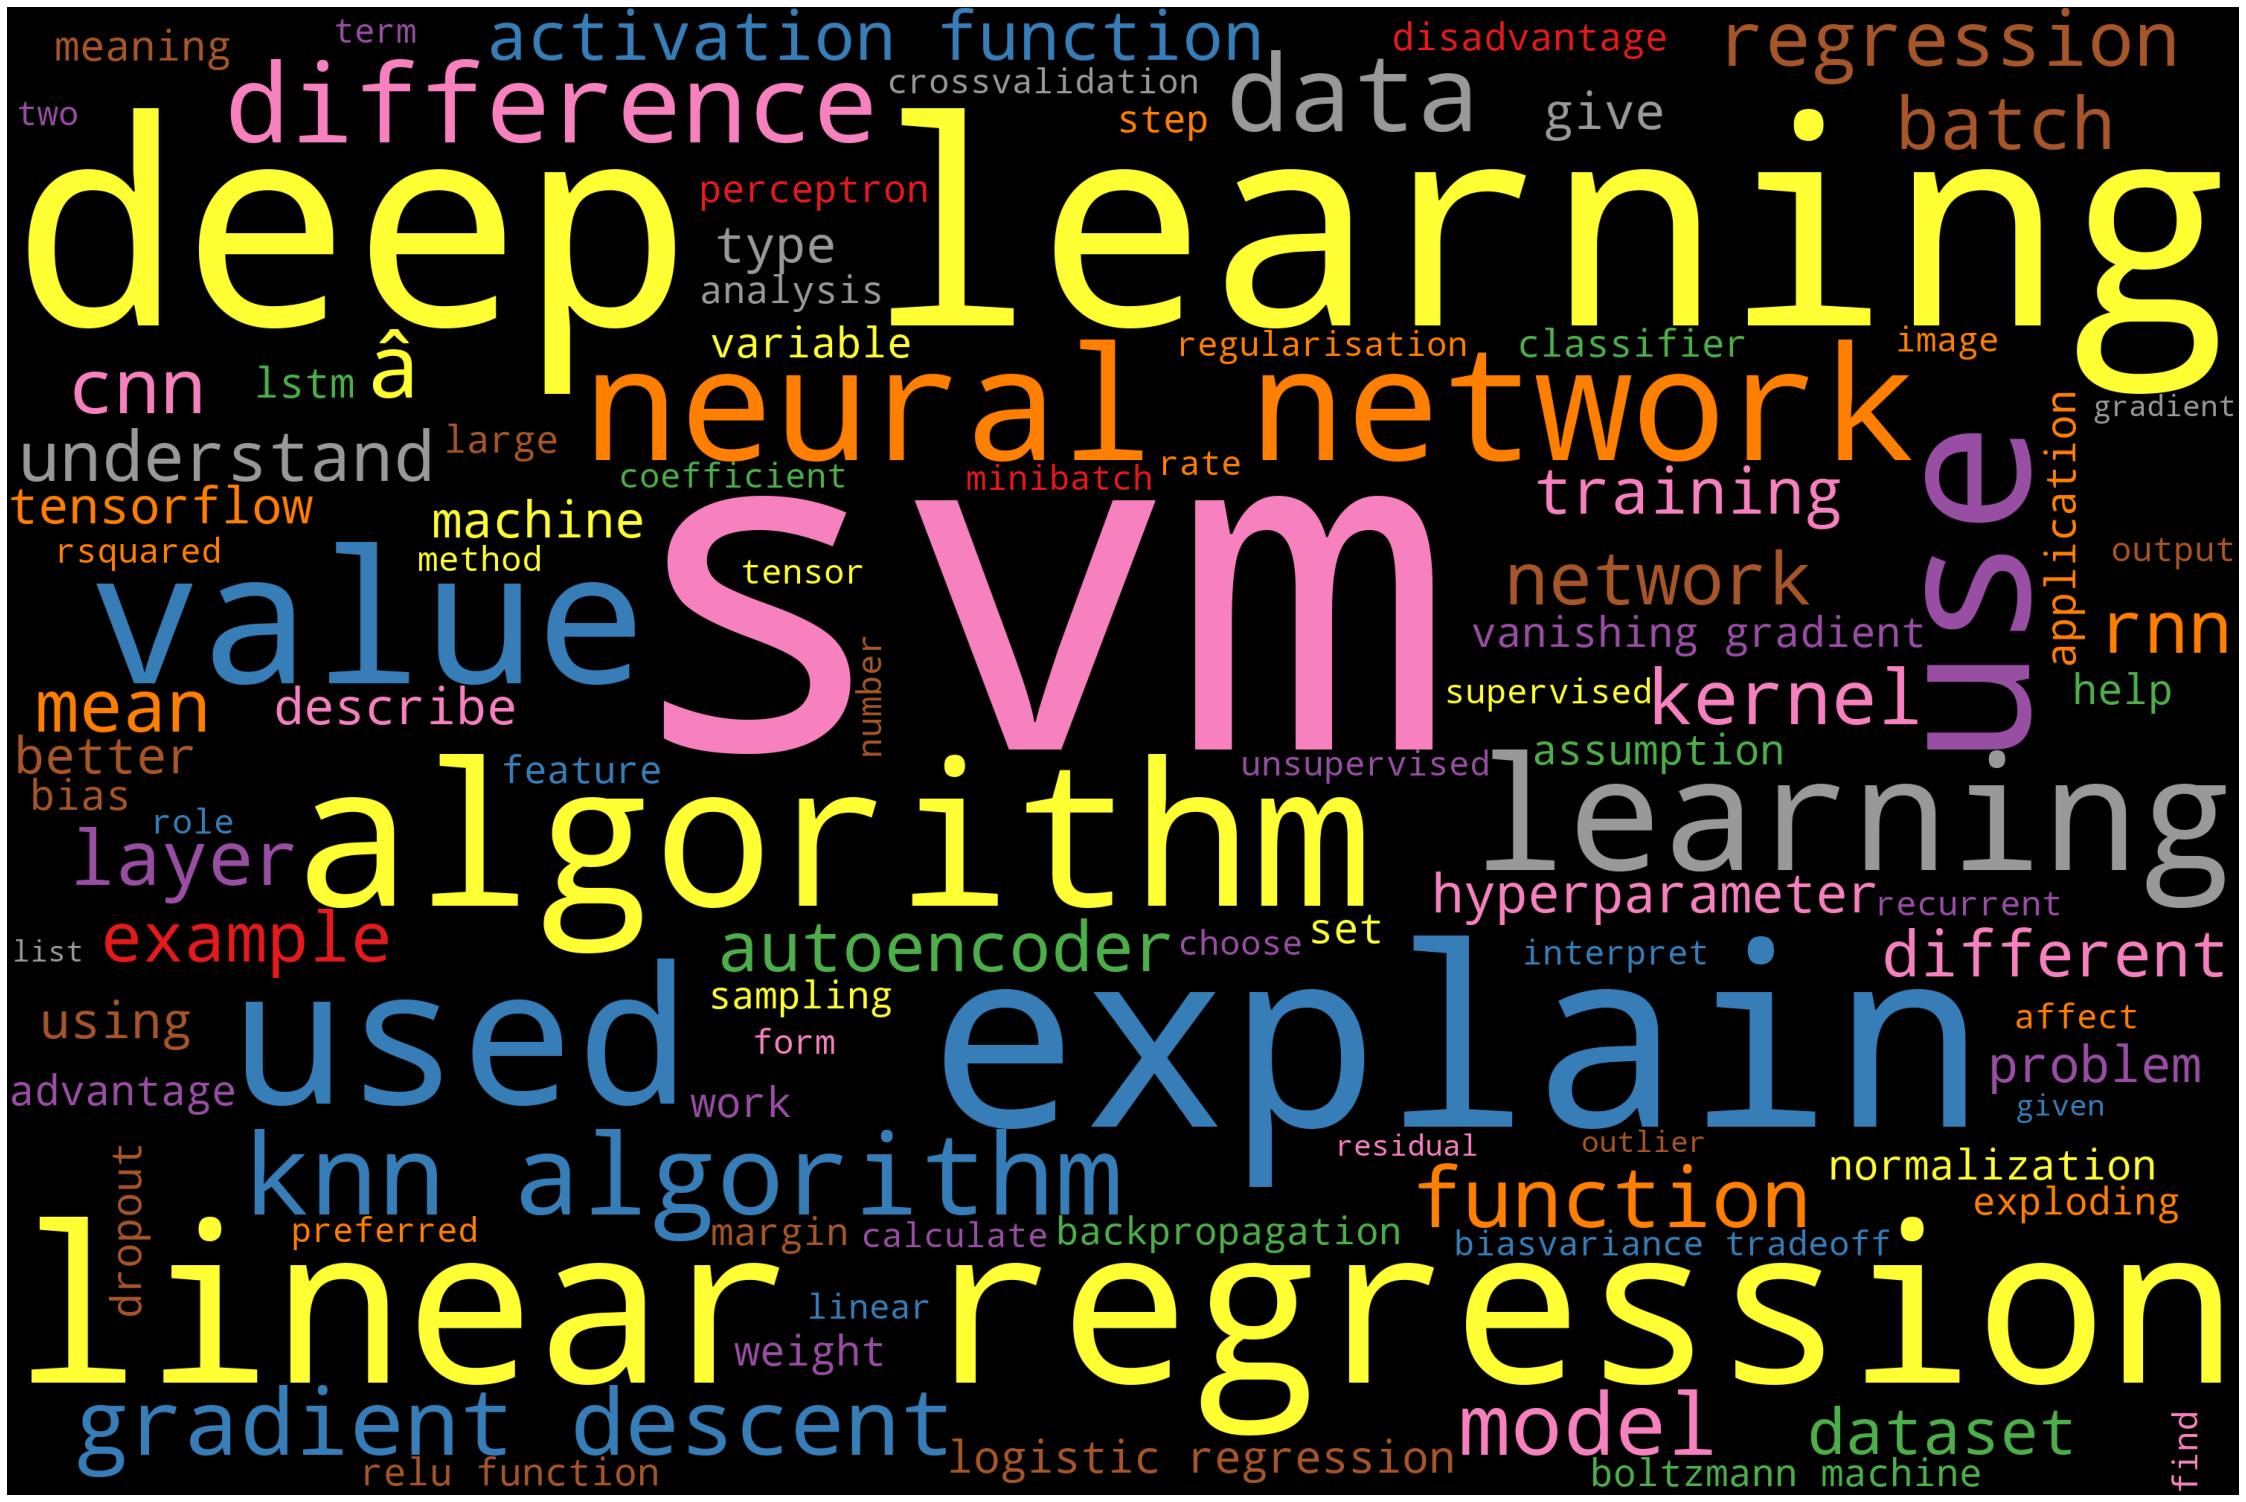

In [22]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set1',stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

In [23]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
sw_nltk = stopwords.words('english')

In [25]:
sw_nltk.extend(['explain','describe','image','`','detail','list','ÃÂÃ','Â','ÂÂ','use','used','ââââ','â','ââ','âââ'])

In [26]:
data['question_clean'] = data['question_clean'].str.split().map(lambda x: [word for word in x if word not in sw_nltk])

In [27]:
data['question_clean']=data['question_clean'].apply(' '.join)

In [28]:
text2 = ' '.join(data['question_clean'])

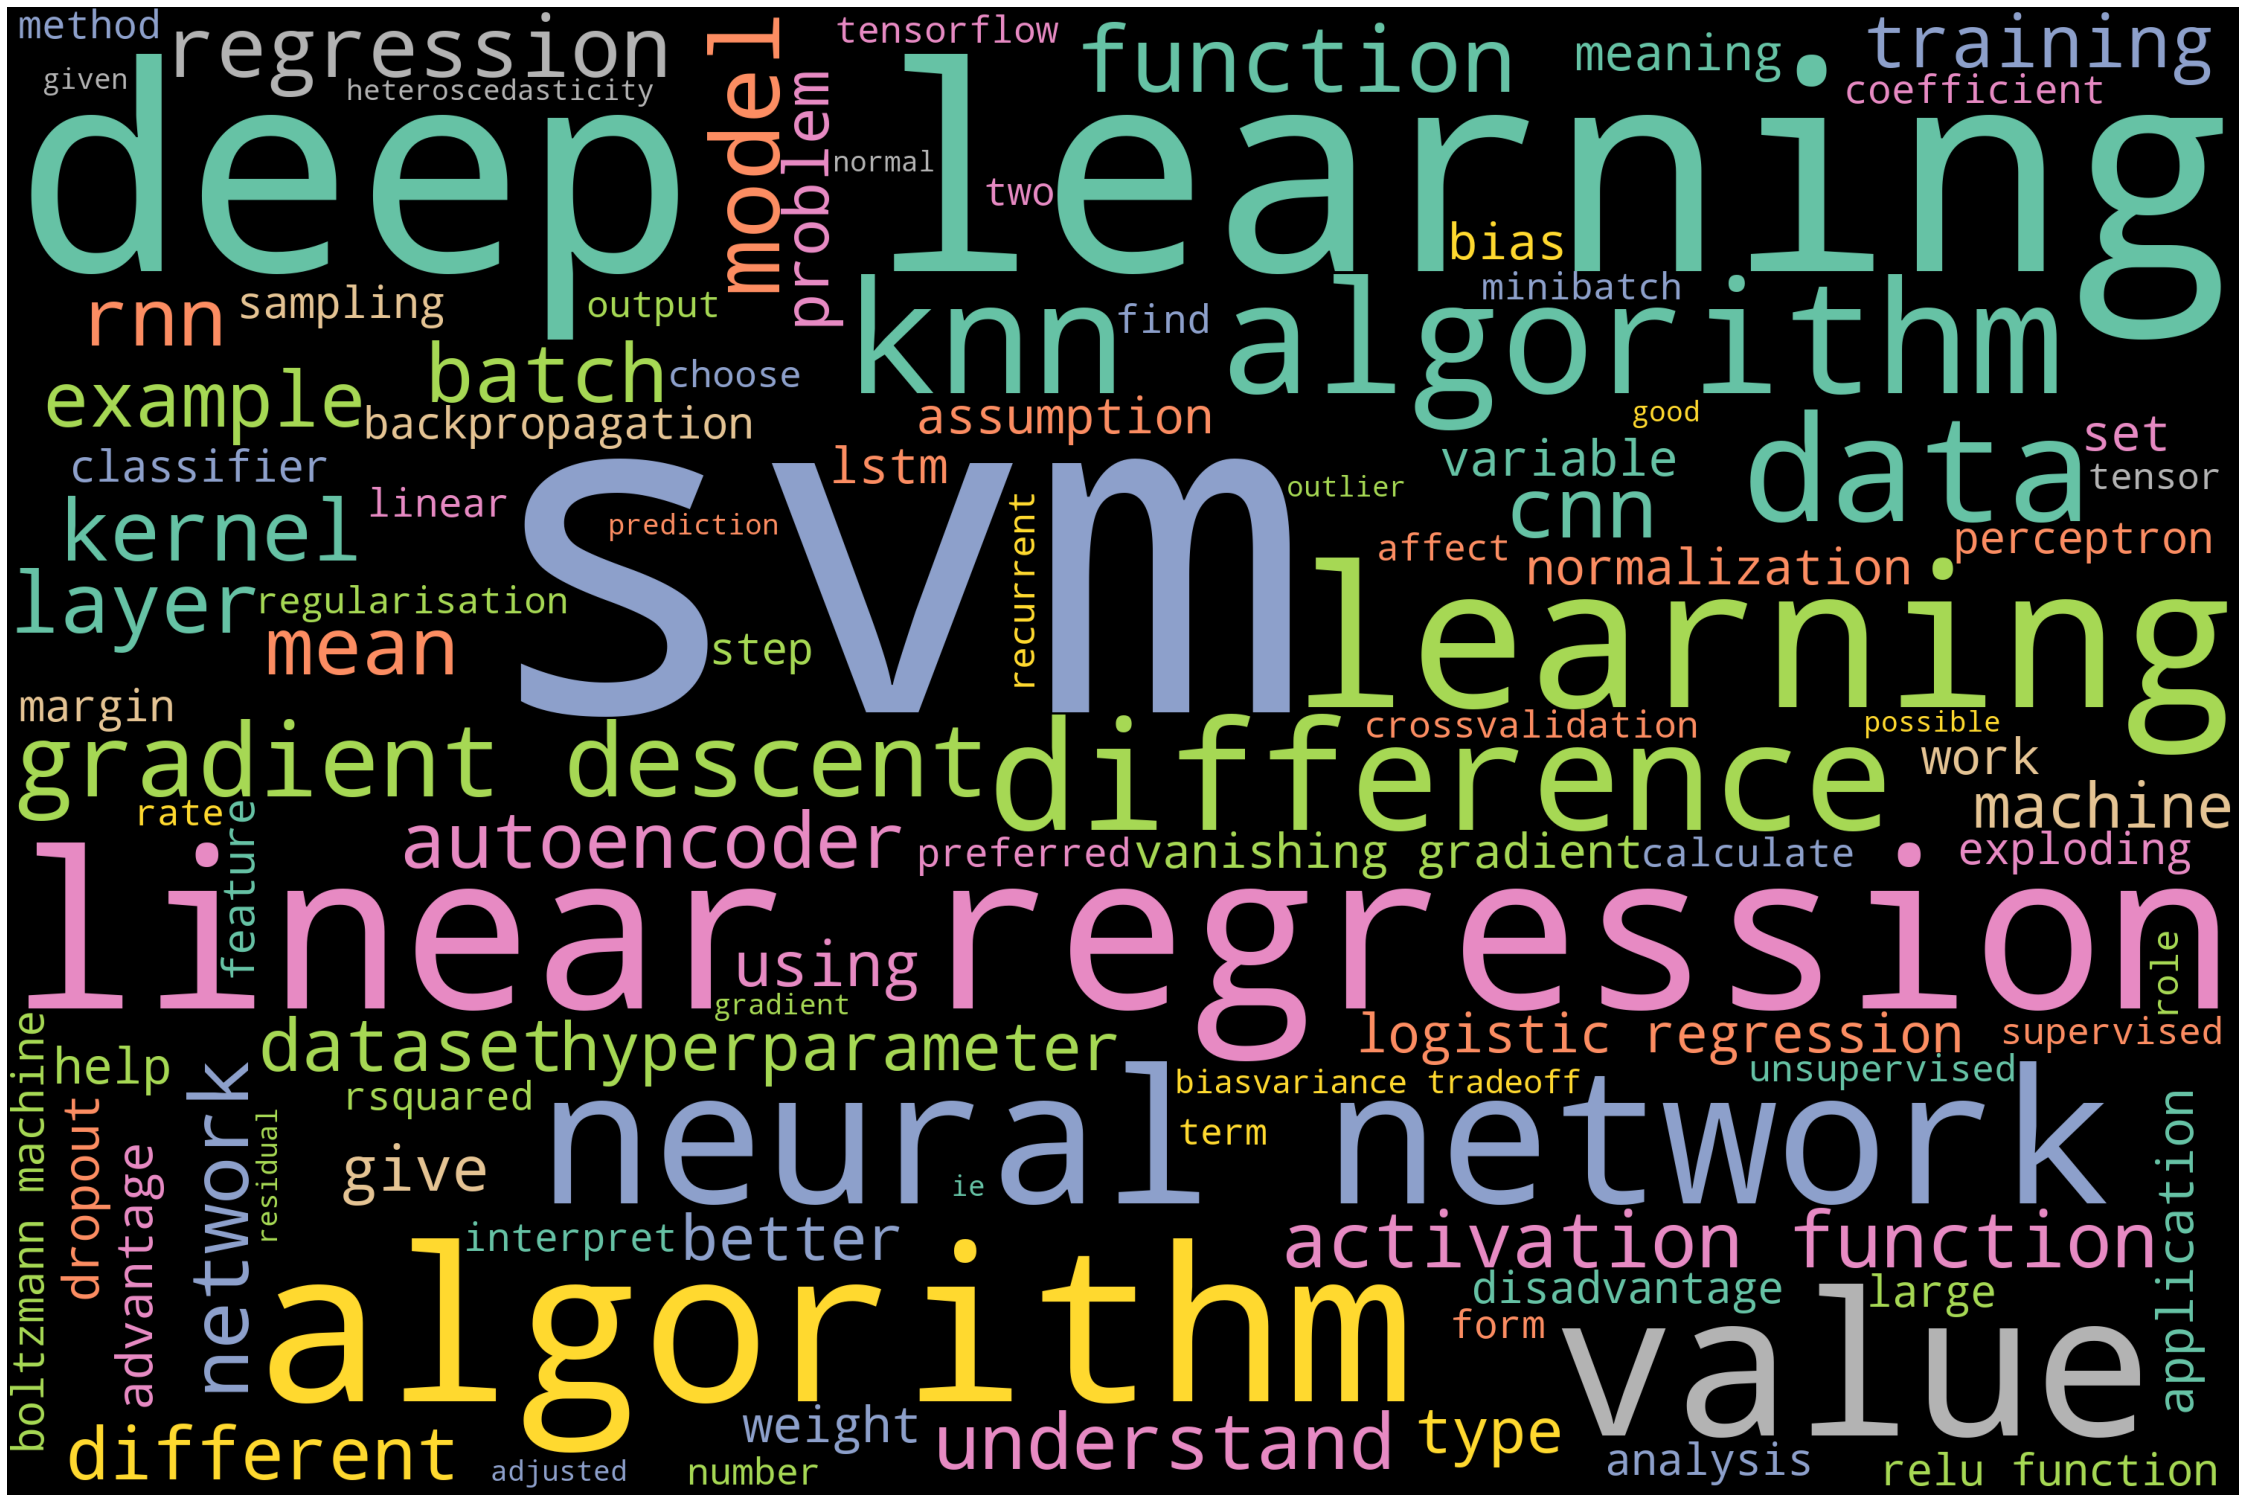

In [29]:
# Generate wordcloud
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text2)
# Plot
plot_cloud(wordcloud)

In [30]:
que=np.array(data['question_clean'])
s=str(que)
que_toc = word_tokenize(s)
print(que_toc)

['[', "'linear", 'regression', 'algorithm', "'", "'interpret", 'linear', 'regression', "model'", "'basic", 'assumption', 'linear', 'regression', "algorithm'", "'difference", 'correlation', "regression'", "'gradient", 'descent', 'algorithm', 'respect', 'linear', "regression'", "'justify", 'case', 'linear', 'regression', 'algorithm', 'suitable', 'given', "dataset'", "'metric", 'evaluate', 'regression', "model'", "'linear", 'regression', 'model', 'interpret', 'qq', "plot'", "'linear", 'regression', 'value', 'sum', 'residual', 'given', 'dataset', 'proper', "justification'", "'rmse", 'mse', 'calculate', "'", "'ols", "'", "'mae", "mape'", "'evaluation", 'metric', 'prefer', 'dataset', 'lot', "outlier'", "'normal", 'form', 'equation', 'linear', "regression'", "'preferred", 'gradient', 'descent', 'method', 'instead', 'normal', 'equation', 'linear', 'regression', "algorithm'", "'rsquared", 'adjusted', 'rsquared', "'", "'flaw", 'rsquared', "'", "'multicollinearity'", "'heteroscedasticity", 'detec

In [31]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [32]:
# Top 20 Bi-gram words
top2_words = get_top_n2_words(data['question_clean'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]


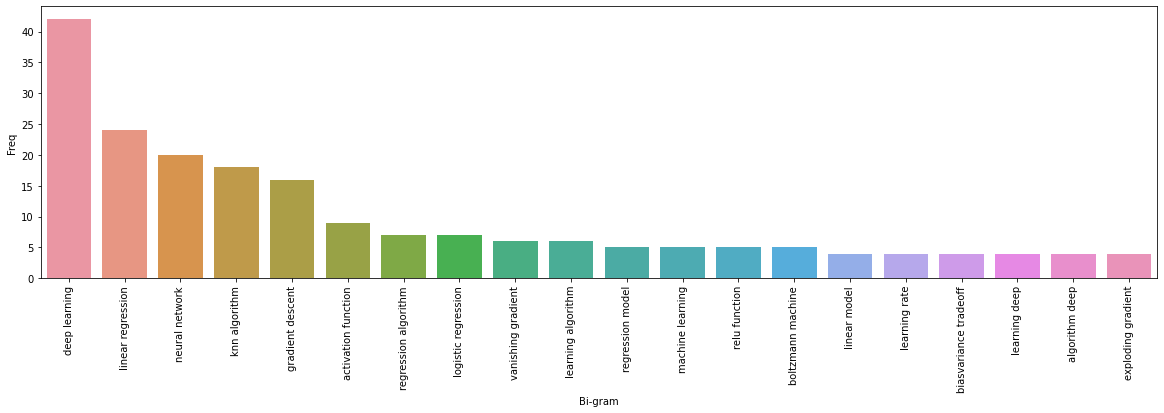

In [33]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

In [34]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [35]:
top3_words = get_top_n3_words(data['question_clean'], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

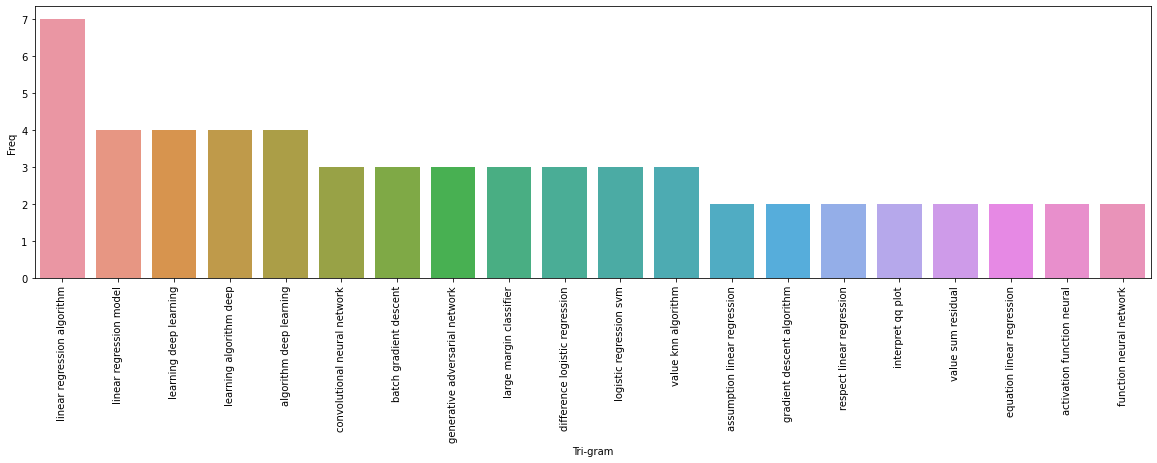

In [36]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (20, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"]);
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      377 non-null    int64 
 1   Questions       377 non-null    object
 2   Answer          375 non-null    object
 3   question_clean  377 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.9+ KB


In [38]:
data=data.dropna(how='any')

In [39]:
# Models 

In [40]:
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [41]:
# Decision Tree Classifier

In [42]:
# Decision Tree Classifier
Pipe = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()), 
     ('classifier',DecisionTreeClassifier(criterion='gini',)) 
    ])

In [43]:
Pipe.fit(data['question_clean'],data['Answer'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000250BDF5AAF0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [44]:
Pipe.predict(['what is auto-encoder'])[0]

'Autoencoders are simple learning networks that aim to transform inputs into outputs with the minimumÂ\xa0 possible error This means that we want the output to be as close to input as possible We add a couple ofÂ\xa0 layers between the input and the output and the sizes of these layers are smaller than the input layer TheÂ\xa0 autoencoder receives unlabelled input which is then encoded to reconstruct the input '

In [45]:
# Greeitngs function

In [46]:
GREETING_INPUTS = ("hello", "hi", "greetings", "sup", "what's up","hey","howdy")
GREETING_RESPONSES = ["hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]
def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

In [47]:
#!pip install termcolor

In [48]:
 from termcolor import colored


In [49]:
flag=True
print("SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye")
while(flag==True):
    response= input()
    response=response.lower()
    if(response!='bye'):
        if(response=='thanks'or response=='thank you' or response=='ok thanks'):
            print(colored('SARTHI: You are welcome....','green',attrs=['bold']))
        else:
            if(greeting(response)!=None):
                print(colored('SARTHI : '+greeting(response),'green', attrs=['bold']))
            elif((Pipe.predict([response])[0]=='Can we apply the kernel trick to logistic regression? Why is it not used in practice then?Ans.Looking at the above it almost feels like kernel logistic regression is what you should be using. However, there are certain advantages that SVMs enjoy' or Pipe.predict([response])[0]=='Explanation:')):
                    print(colored("SARTHI : Sorry I can't understand please rephrase the question" ,'red', attrs=['bold']))
            else:
                print(colored('SARTHI: '+Pipe.predict([response])[0],'blue', attrs=['bold']))
    else:
        flag=False
        print (colored('SARTHI : Bye! take care..............','green',attrs=['bold']))

SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye
hi
SARTHI : hi there
knn
SARTHI: Yes feature scaling is required to get the better performance of the KNN algorithmFor Example Imagine a dataset having n number of instances and N number of features There is one feature having values ranging between 0 and 1 Meanwhile there is also a feature that varies from 999 to 999 When these values are substituted in the formula of Euclidean Distance this will affect the performance by giving higher weightage to variables having a higher magnitudeÂ 
bye
SARTHI : Bye! take care..............


In [50]:
# Naive Bayes

In [51]:
from sklearn.naive_bayes import MultinomialNB as MB

In [52]:

Pipe2 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',MB()) 
    ])

In [53]:
Pipe2.fit(data['question_clean'],data['Answer'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000250BDF5AAF0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [54]:
Pipe2.predict(['what is auto-encoder'])[0]

'Autoencoders are simple learning networks that aim to transform inputs into outputs with the minimumÂ\xa0 possible error This means that we want the output to be as close to input as possible We add a couple ofÂ\xa0 layers between the input and the output and the sizes of these layers are smaller than the input layer TheÂ\xa0 autoencoder receives unlabelled input which is then encoded to reconstruct the input '

In [55]:
flag=True
print("SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye")
while(flag==True):
    response= input()
    response=response.lower()
    if(response!='bye'):
        if(response=='thanks'or response=='thank you' or response=='ok thanks'):
            print(colored('SARTHI: You are welcome....','green',attrs=['bold']))
        else:
            if(greeting(response)!=None):
                print(colored('SARTHI : '+greeting(response),'green', attrs=['bold']))
            elif((Pipe2.predict([response])[0]=='Can we apply the kernel trick to logistic regression? Why is it not used in practice then?Ans.Looking at the above it almost feels like kernel logistic regression is what you should be using. However, there are certain advantages that SVMs enjoy'
                  or Pipe2.predict([response])[0]=='Explanation')):
                    print(colored("SARTHI : Sorry I can't understand please rephrase the question" ,'red', attrs=['bold']))
            else:
                print(colored('SARTHI: '+Pipe2.predict([response])[0],'blue', attrs=['bold']))
    else:
        flag=False
        print (colored('SARTHI : Bye! take care..............','green',attrs=['bold']))

SARTHI : Hello Iam SARTHI . I will answer your queries on Supervised learning. If you want to exit , type Bye
knn
SARTHI : Sorry I can't understand please rephrase the question
hi
SARTHI : I am glad! You are talking to me
leanear regresion
SARTHI : Sorry I can't understand please rephrase the question
svm
SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question

SARTHI : Sorry I can't understand please rephrase the question
bye
SARTHI : Bye! take care..............


In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
Pipe3 = Pipeline(
    [ ('bow',CountVectorizer(analyzer=cleaner)),
     ('tfidf',TfidfTransformer()),
     ('classifier',RandomForestClassifier()) 
    ])

In [58]:
Pipe3.fit(data['question_clean'],data['Answer'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x00000250BDF5AAF0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [59]:
Pipe3.predict(['list some advantage of decision tree'])[0]

'Pruning is a technique in machine learning and search algorithms that reduces the size of decisionÂ\xa0 trees by removing sections of the tree that provide little power to classify instances So when we removeÂ\xa0 subnodes of a decision node this process is called pruning or opposite process of splitting '

In [60]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
corpus = data['question_clean'].tolist()

In [62]:
coun_vect = CountVectorizer()
count_matrix = coun_vect.fit_transform(corpus)
count_array = count_matrix.toarray()
f = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
f.iloc[:,1:]

,ab,able,accuracy,act,activation,actually,ada,adam,adding,adjusted,...,worked,working,would,wrong,zero,âkernel,âkâ,ânaiveâ,âsvm,î³
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(f)

TfidfTransformer()

In [64]:
tfidf_transformer.transform(f).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])